<H1><B>Exploring Travel Trends:
 <br>   A Journey through Synthetic Transit Data <br>with Feature Engineering and EDA</H1>

Vishnu Vardhan Kosuru<BR>
AM.EN.U4CSE21032

<h2><B>TABLE OF CONTENTS</B><BR></h2>

1. Introduction to EDA<br>
1. Creating Synthetic Dataset<BR>
1. Getting to know more about our dataset<BR>
    * Packages Used
    * Description of the Dataset<BR>
    * Feature Labelling

2. Data Cleaning and Preprocessing<BR>
    * Cleaning duplicates in the dataset<BR>
    * Handling missing values<BR>
    * Outlier detection<BR>
    * Data Type Conversion<BR>
3. Detailed Analysis <BR>
    * Univariate & Bivariate analysis<BR>
    * Feature Selection<BR>
    * Feature Engineering<BR>
    * Diffrent Visualizations used to solve various questions<BR>
4. Conclusion<BR>



    





<h3><b>1. Introduction to EDA</b></h3><br>

<b>Exploratory Data Analysis</b> (EDA) is the process of thoroughly examining and understanding our data. It's like taking a closer look at all the pieces in a puzzle box to comprehend the whole picture.

In this exploration, we use charts and graphs as tools to visualize patterns, relationships, and distributions within the data. These visual aids help us grasp the story that the data is trying to convey, highlighting any peculiarities or missing elements.

EDA allows us to identify trends, outliers, and important features in the dataset. By creating these visual representations, we can uncover valuable insights about the various aspects of the data.

In essence, EDA is about getting more familiar with our data, understanding its different components, and recognizing how they interconnect. This preliminary step is essential before moving into more advanced analyses or making informed decisions based on the data.


<h3><b>2. Creating Synthetic Dataset</b></h3>

In [1]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Define function to generate synthetic data
def generate_synthetic_data(num_samples):
    data = []

    for _ in range(num_samples):
        # Origin and destination
        origin_options = ['Delhi', 'Haryana', 'Punjab', 'Uttar Pradesh', 'Varanasi', 'Lucknow', 'Pune', 'Kolkata']
        destination_options = ['Delhi', 'Haryana', 'Punjab', 'Uttar Pradesh', 'Varanasi', 'Lucknow', 'Pune', 'Kolkata']

        # Ensure that origin and destination are different
        origin = np.random.choice(origin_options)
        destination_options.remove(origin)
        destination = np.random.choice(destination_options)

        # Day and time of day
        day = np.random.choice(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        time_of_day = np.random.choice(['morning', 'evening', 'afternoon'])

        # Travel mode
        travel_mode = np.random.choice(['bus', 'train', 'aeroplane'])

        # Travel duration
        if travel_mode == 'bus':
            travel_duration = np.random.randint(60, 420, 1)[0] // 10 * 10  # in minutes, multiples of 10
        elif travel_mode == 'train':
            travel_duration = np.random.randint(120, 300, 1)[0] // 10 * 10  # in minutes, multiples of 10
        else:
            travel_duration = np.random.randint(30, 120, 1)[0] // 10 * 10  # in minutes, multiples of 10

        # Mode of transport and season dependency
        if travel_mode == 'aeroplane':
            season = 'rainy'  # Assuming aeroplanes operate during rainy seasons
        else:
            season = np.random.choice(['winter', 'summer', 'autumn', 'spring', 'rainy'])

        # Travel volume
        if travel_mode == 'bus':
            travel_volume = np.random.randint(15, 121, 1)[0] // 10 * 10  # multiples of 10
        elif travel_mode == 'train':
            travel_volume = np.random.randint(500, 2001, 1)[0] // 10 * 10  # multiples of 10
        else:
            travel_volume = np.random.randint(475, 854, 1)[0] // 10 * 10  # multiples of 10

        # Cost of travel
        if travel_mode == 'bus':
            cost_of_travel = np.random.randint(15, 501, 1)[0] // 10 * 10  # multiples of 10
            if season == 'rainy':
                cost_of_travel += np.random.randint(3, 6) * 100  # additional cost in the range [300, 500]
        elif travel_mode == 'train':
            cost_of_travel = np.random.randint(50, 666, 1)[0] // 10 * 10  # multiples of 10
            if season == 'rainy':
                cost_of_travel += np.random.randint(3, 6) * 100  # additional cost in the range [300, 500]
        elif travel_mode == 'aeroplane' and season != 'rainy':
            # Assuming aeroplanes have higher costs, but not available in rainy season
            cost_of_travel = np.random.randint(2000, 8001, 1)[0] // 100 * 100  # multiples of 100
        else:
            # If it's not the rainy season and the mode is not specified, set cost to 0
            cost_of_travel = 0


        # Delay
        delay = np.random.randint(5, 151, 1)[0] // 5 * 5  # multiples of 5

        # Customer rating
        if delay <= 30:
            customer_rating = round(np.random.uniform(4, 5), 1)
        elif delay <= 60:
            customer_rating = round(np.random.uniform(3, 4), 1)
        else:
            customer_rating = round(np.random.uniform(1, 3), 1)

        # Append to the data list
        data.append([day, time_of_day,origin, destination, travel_mode, travel_duration, season, int(travel_volume),
                     int(cost_of_travel), delay, customer_rating])

    # Create a DataFrame
    columns = ['Day', 'TimeOfDay', 'Origin', 'Destination', 'TravelMode', 'TravelDuration', 'Season', 'TravelVolume',
               'CostOfTravel', 'Delay', 'CustomerRating']
    df = pd.DataFrame(data, columns=columns)

    return df

# Generate synthetic data with 1200 samples (without 'Income' column)
synthetic_data = generate_synthetic_data(1200)

# Save the synthetic dataset without 'Income' to a CSV file
synthetic_data.to_csv('transport.csv', index=False)


In [2]:
# Display basic arthemetic operations
print("Basic Statistics:")
synthetic_data.describe()

Basic Statistics:


,TravelDuration,TravelVolume,CostOfTravel,Delay,CustomerRating
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,168.391667,646.550000,248.700000,75.691667,2.830833
std,98.626074,551.650732,262.716565,42.443368,1.139268
min,30.000000,10.000000,0.000000,5.000000,1.000000
25%,80.000000,80.000000,0.000000,40.000000,1.900000
50%,150.000000,620.000000,190.000000,75.000000,2.700000
75%,240.000000,852.500000,440.000000,110.000000,3.800000
max,410.000000,2000.000000,1150.000000,150.000000,5.000000


In [3]:
synthetic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Day             1200 non-null   object 
 1   TimeOfDay       1200 non-null   object 
 2   Origin          1200 non-null   object 
 3   Destination     1200 non-null   object 
 4   TravelMode      1200 non-null   object 
 5   TravelDuration  1200 non-null   int64  
 6   Season          1200 non-null   object 
 7   TravelVolume    1200 non-null   int64  
 8   CostOfTravel    1200 non-null   int64  
 9   Delay           1200 non-null   int64  
 10  CustomerRating  1200 non-null   float64
dtypes: float64(1), int64(4), object(6)
memory usage: 103.3+ KB


In [4]:
#to print the first 5 rows
synthetic_data.head()

,Day,TimeOfDay,Origin,Destination,TravelMode,TravelDuration,Season,TravelVolume,CostOfTravel,Delay,CustomerRating
0,Friday,afternoon,Pune,Uttar Pradesh,aeroplane,100,rainy,660,0,25,4.2
1,Wednesday,afternoon,Punjab,Kolkata,bus,150,autumn,30,320,5,4.7
2,Tuesday,morning,Lucknow,Pune,bus,370,rainy,100,560,60,3.4
3,Thursday,afternoon,Kolkata,Uttar Pradesh,train,290,autumn,1760,550,135,2.7
4,Monday,afternoon,Pune,Varanasi,train,250,winter,810,60,10,4.0


<h3><b>3. Getting to know more about our dataset</b></h3><br>



*   <b>Packages Used</b><br>
<br>
       <b>Pandas (import pandas as pd):</b>
    <ul>
        <li><strong>Description:</strong> Pandas is a powerful data manipulation and analysis library. It provides data
            structures like DataFrames for efficient data handling and analysis.</li>
    </ul>

    <b>NumPy (import numpy as np):</b>
    <ul>
        <li><strong>Description:</strong> NumPy is a library for numerical computations in Python. It provides support for
            large, multi-dimensional arrays and matrices, along with mathematical functions to operate on these arrays.</li>
    </ul>

    <b>Random (import random):</b>
    <ul>
        <li><strong>Description:</strong> The random module is a part of Python's standard library and provides functions
            for generating pseudo-random numbers.</li>
    </ul>

    <b>Seaborn (import seaborn as sns):</b>
    <ul>
        <li><strong>Description:</strong> Seaborn is a statistical data visualization library based on Matplotlib. It
            provides a high-level interface for drawing attractive and informative statistical graphics.</li>
    </ul>

    <b>Matplotlib (import matplotlib.pyplot as plt):</b>
    <ul>
        <li><strong>Description:</strong> Matplotlib is a popular plotting library in Python. It provides a wide variety of
            charts and plots for visualizing data.</li>
    </ul>

    <b>OS (import os):</b>
    <ul>
        <li><strong>Description:</strong> The os module provides a way to use operating system-dependent functionality,
            such as reading or writing to the file system.</li>
    </ul>
<br>
<br>
*   <b>Description of the dataset</b><br>

      The dataset is a synthetic collection of transportation-related information generated for analysis and exploration. It consists of 1200 samples, each representing a travel instance. The data includes details such as the day of the week, time of day, origin, destination, chosen travel mode (bus, train, or aeroplane), travel duration, seasonal information (winter, summer, autumn, spring, or rainy), travel volume, cost of travel, delay duration, and customer rating.

      The travel modes have associated characteristics, with bus and train costs subject to seasonal variations during the rainy season. Aeroplane travel is assumed to operate exclusively during the rainy season. Travel durations vary based on the chosen mode, and delays are introduced with multiples of 5 minutes. Customer ratings are influenced by the delay duration, with higher ratings for shorter delays.

      This synthetic dataset aims to provide a diverse set of scenarios for exploratory data analysis and serves as a foundation for understanding patterns, relationships, and trends within the transportation domain.

*   <b>Feature Labelling</b><br>
<h2><strong>CATEGORICAL FEATURES:</strong></h2>

  <p><strong>DAY (Data Type: Object):</strong> Represents the day of the week when the travel occurs, providing information about the temporal aspect of travel patterns.</p>

  <p><strong>TIMEOFDAY (Data Type: Object):</strong> Indicates the time of day when the travel takes place, offering insights into travel behaviors based on different parts of the day such as morning, evening, or afternoon.</p>

  <p><strong>ORIGIN (Data Type: Object):</strong> Denotes the starting location of the travel, providing information about the departure points and potential regional patterns.</p>

  <p><strong>DESTINATION (Data Type: Object):</strong> Represents the destination of the travel, offering insights into popular travel destinations and possible regional preferences.</p>

  <p><strong>TRAVELMODE (Data Type: Object):</strong> Indicates the mode of transportation used for travel, offering insights into the distribution of travel modes among the dataset.</p>

  <p><strong>SEASON (Data Type: Object):</strong> Represents the season during which the travel occurs, providing information about the seasonal variations in travel patterns.</p>

<h2><strong>NUMERICAL FEATURES:</strong></h2>

  <p><strong>TRAVELDURATION (Data Type: Int64):</strong> Represents the duration of the travel in minutes, offering insights into the time taken for different travel modes.</p>

  <p><strong>TRAVELVOLUME (Data Type: Int64):</strong> Indicates the volume of travel, possibly representing the number of passengers or the frequency of travel. This can provide insights into travel demand.</p>

  <p><strong>COSTOFTRAVEL (Data Type: Int64):</strong> Represents the cost associated with the travel, providing information about the financial aspect of different travel modes.</p>

  <p><strong>DELAY (Data Type: Int64):</strong> Denotes the delay in minutes, offering insights into the punctuality and reliability of different travel modes.</p>

  <p><strong>CUSTOMERRATING (Data Type: Float64):</strong> Represents the customer rating given for the travel experience, providing feedback on the satisfaction level of passengers.</p>






<h3><b>4. Data cleaning and preprocessing</b></h3><br>

* Handle Duplicate entries in the dataset.


* Creating a copy of a DataFrame using <b>df2 = synthetic_data.copy()</b> is a common practice to avoid unintended modifications to the original DataFrame.


In [5]:
df2 = synthetic_data.copy()

* Inserting random <b>null values</b> in our dataset

In [6]:
def add_missing_values(df, missing_prob=0.05, exclude_columns=None):
    for column in df.columns:
        # Exclude specified columns
        if exclude_columns is not None and column in exclude_columns:
            continue

        # Generate a random mask with the specified probability
        missing_mask = np.random.rand(len(df)) < missing_prob
        # Set values to NaN based on the mask
        df.loc[missing_mask, column] = np.nan
    return df

# Add missing values to df2 excluding 'CustomerRating'
exclude_columns = ['CustomerRating']
df2_with_missing = add_missing_values(df2, missing_prob=0.05, exclude_columns=exclude_columns)
df2_with_missing.head()


,Day,TimeOfDay,Origin,Destination,TravelMode,TravelDuration,Season,TravelVolume,CostOfTravel,Delay,CustomerRating
0,Friday,afternoon,Pune,Uttar Pradesh,aeroplane,100.0,rainy,660.0,0.0,25.0,4.2
1,Wednesday,afternoon,Punjab,Kolkata,bus,150.0,autumn,30.0,320.0,5.0,4.7
2,Tuesday,morning,Lucknow,Pune,bus,370.0,rainy,100.0,560.0,60.0,3.4
3,Thursday,afternoon,Kolkata,Uttar Pradesh,train,290.0,autumn,1760.0,550.0,135.0,2.7
4,Monday,afternoon,Pune,Varanasi,train,250.0,winter,810.0,60.0,10.0,4.0


In [7]:
df2.isnull().sum()

Day               64
TimeOfDay         70
Origin            66
Destination       47
TravelMode        69
TravelDuration    55
Season            60
TravelVolume      55
CostOfTravel      67
Delay             51
CustomerRating     0
dtype: int64

*
The <b>msno.matrix</b> is a visualization tool provided by the <b>"missingno" </b>library in Python. It is used to visualize the pattern of missing values in a DataFrame, providing a quick overview of where the missing values are located.

In [8]:
import missingno as msno

<Axes: >

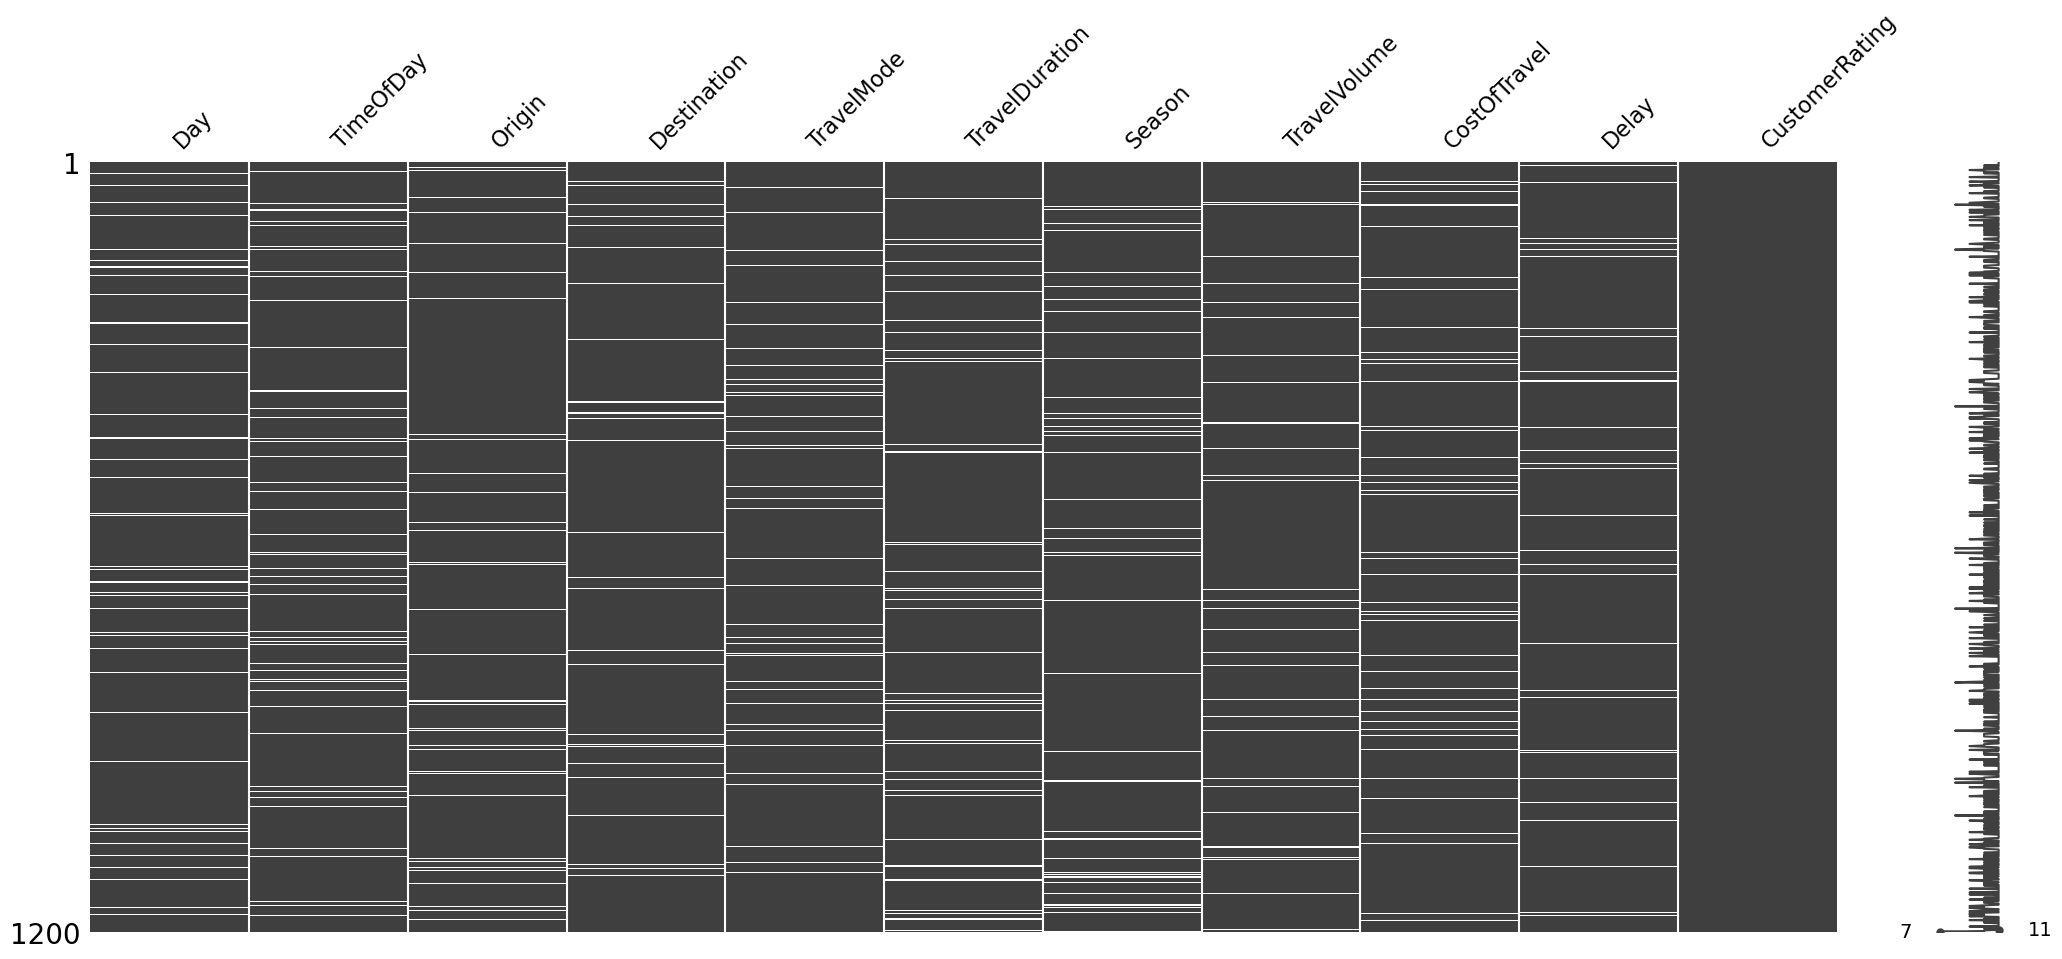

In [9]:
#visualize missing values as matrix
msno.matrix(df2)

* Handling the missing entries back again <b>using MODE for categorical</b> & <b>mode for MEAN for numerical </b>

In [10]:
# Handling missing values for numerical variables
df2['TravelVolume'].fillna(df2['TravelVolume'].mean(), inplace=True)
df2['CostOfTravel'].fillna(df2['CostOfTravel'].mean(), inplace=True)
df2['TravelDuration'].fillna(df2['TravelDuration'].mean(), inplace=True)
df2['Delay'].fillna(df2['Delay'].mean(), inplace=True)

# Handling missing values for categorical variables
df2['Day'].fillna(df2['Day'].mode()[0], inplace=True)
df2['TimeOfDay'].fillna(df2['TimeOfDay'].mode()[0], inplace=True)
df2['Origin'].fillna(df2['Origin'].mode()[0], inplace=True)
df2['Destination'].fillna(df2['Destination'].mode()[0], inplace=True)
df2['TravelMode'].fillna(df2['TravelMode'].mode()[0], inplace=True)
df2['Season'].fillna(df2['Season'].mode()[0], inplace=True)

# Check if there are any remaining missing values
df2.isnull().sum()


Day               0
TimeOfDay         0
Origin            0
Destination       0
TravelMode        0
TravelDuration    0
Season            0
TravelVolume      0
CostOfTravel      0
Delay             0
CustomerRating    0
dtype: int64

<Axes: >

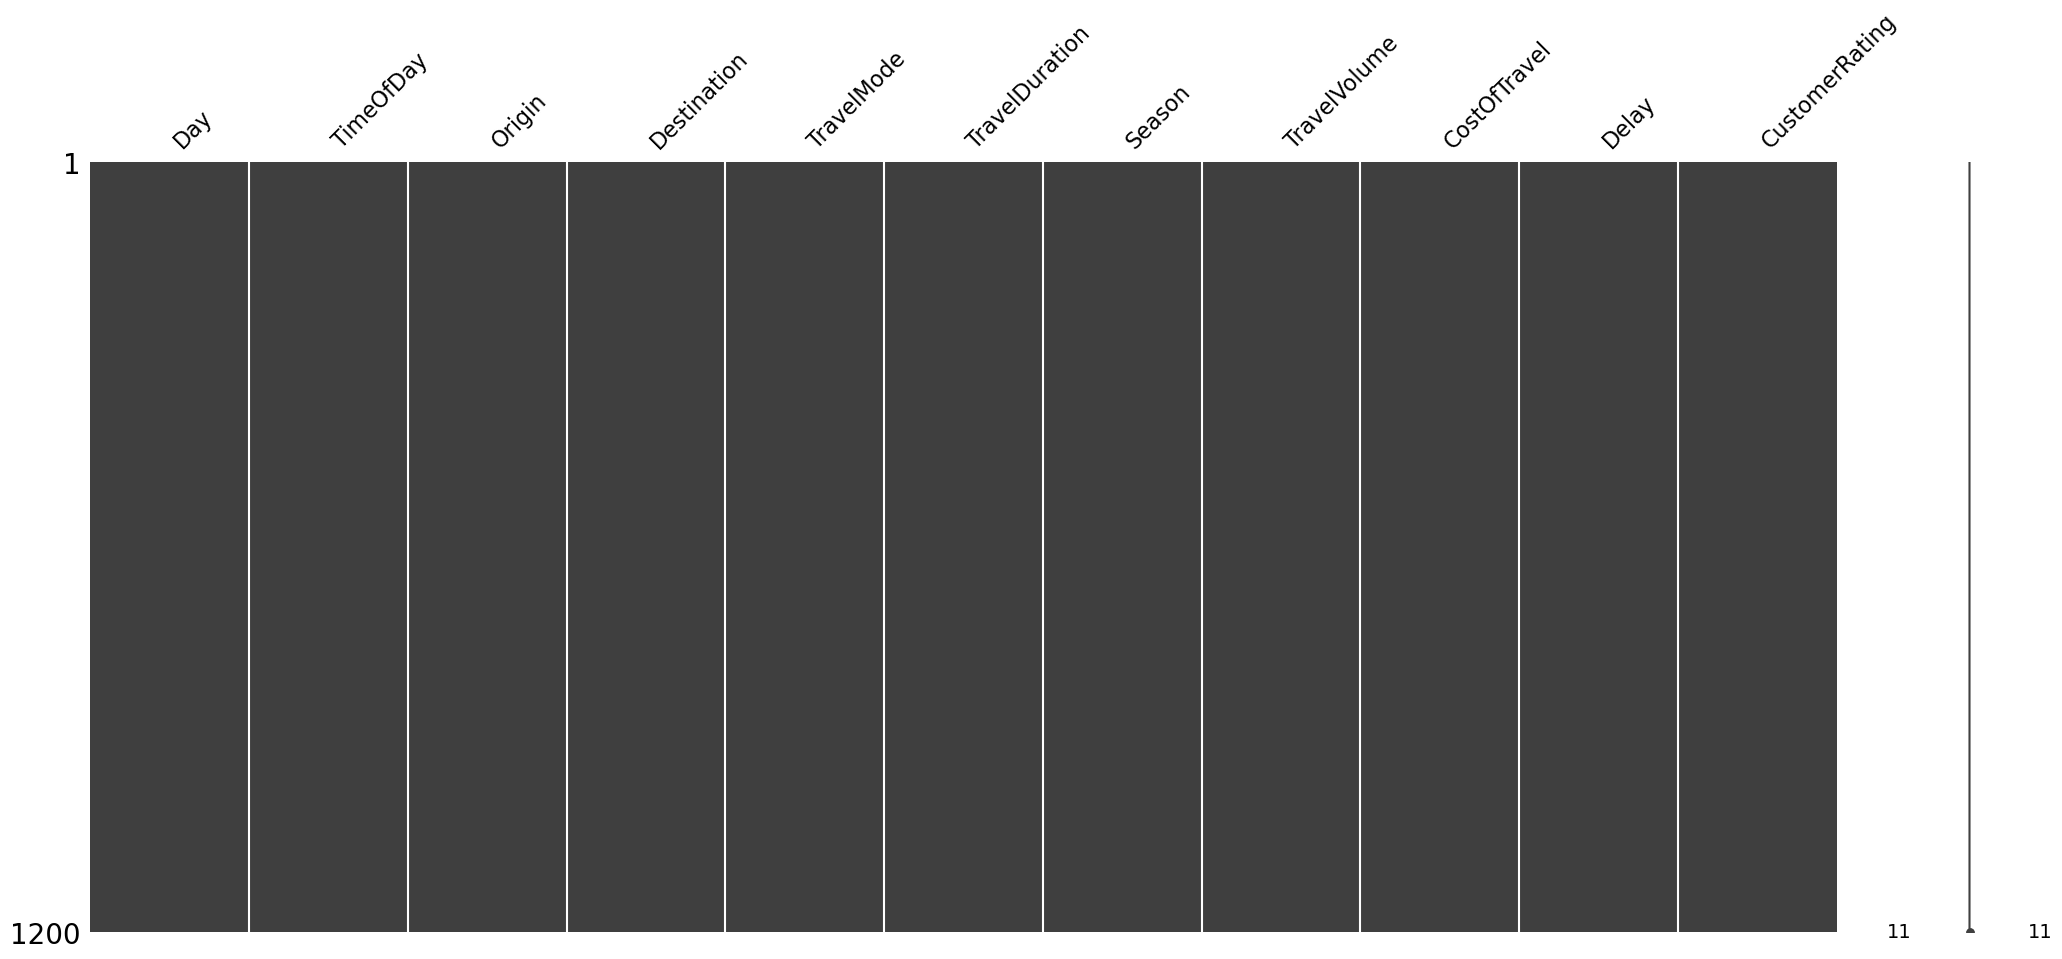

In [11]:
msno.matrix(df2)

<Axes: >

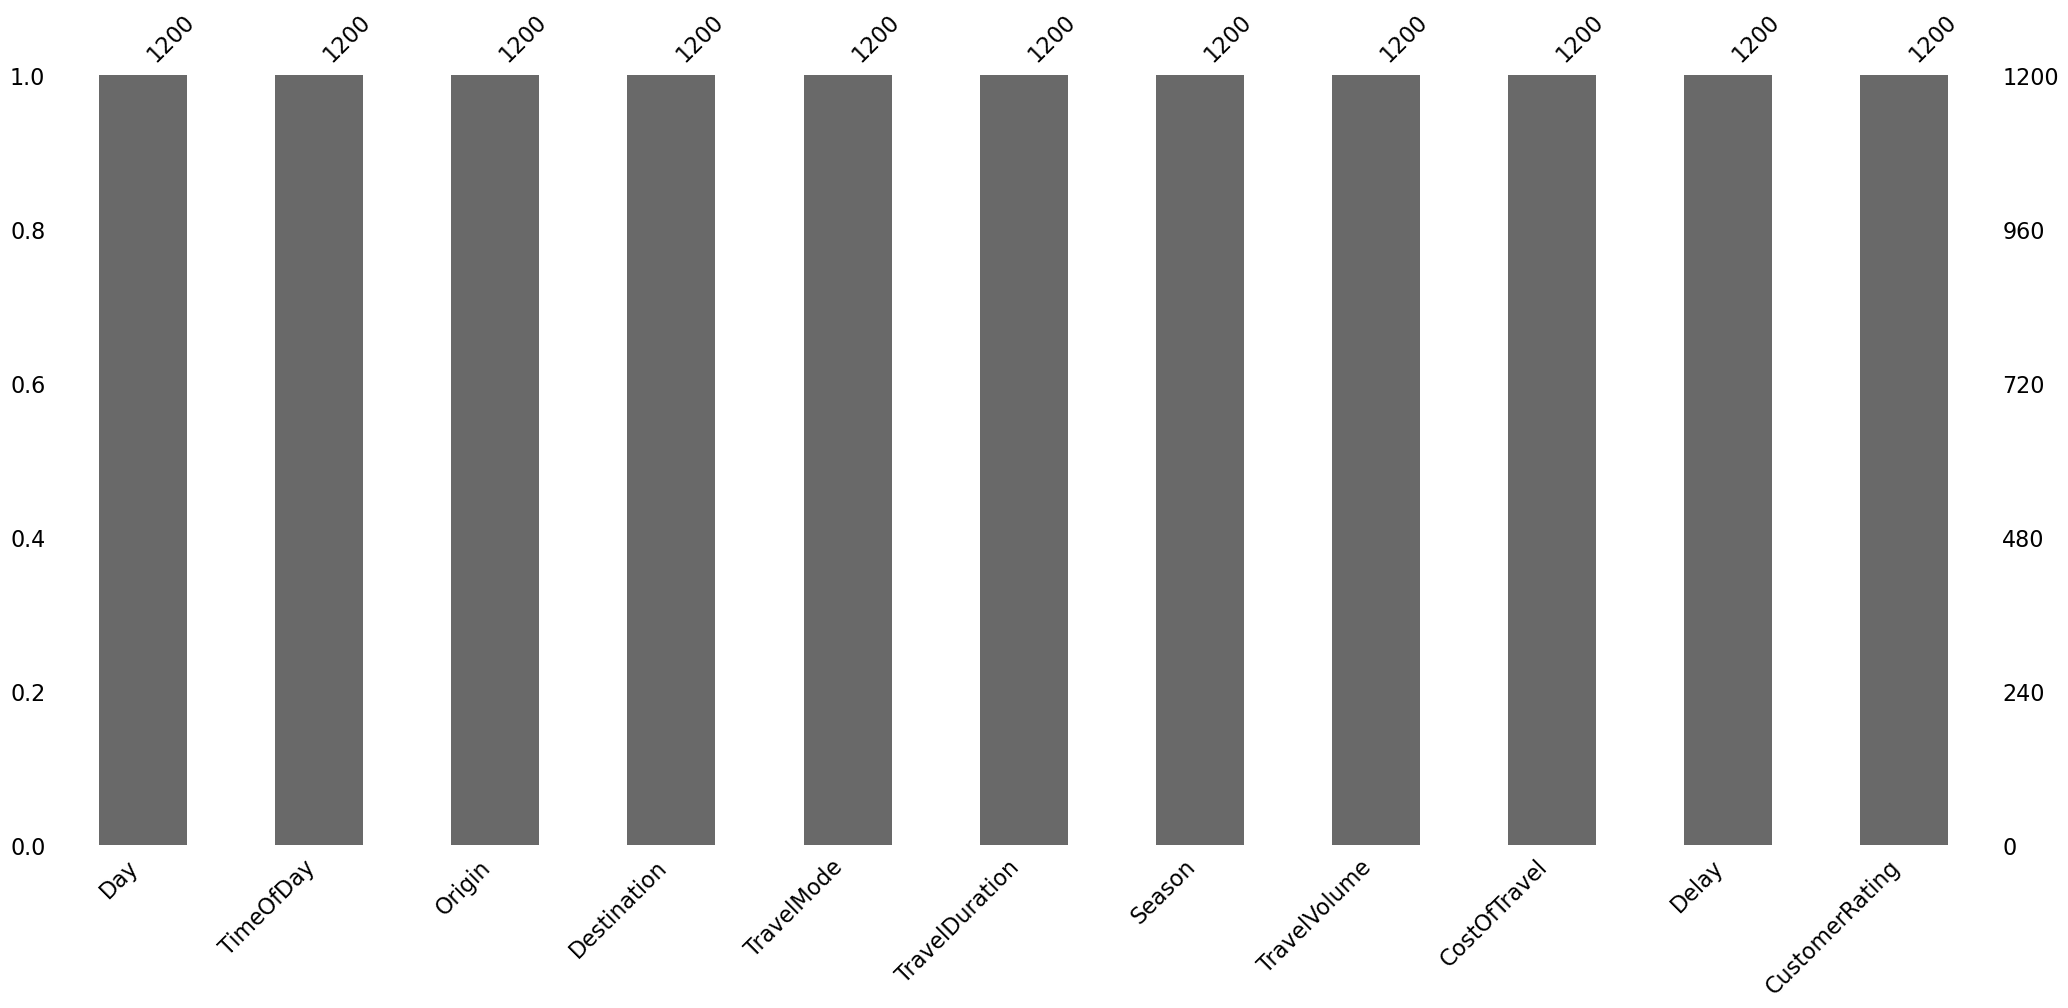

In [12]:
msno.bar(df2)

* <B>OUTLIER DETECTION </B><BR>
The provided code creates a 2x2 subplot grid to visually detect outliers in the 'TravelDuration,' 'CostOfTravel,' and 'Delay' columns of the DataFrame df2. Boxplots are utilized for each variable, where points beyond the whiskers are potential outliers, providing a quick overview of the distribution and identification of extreme values in these travel-related features.

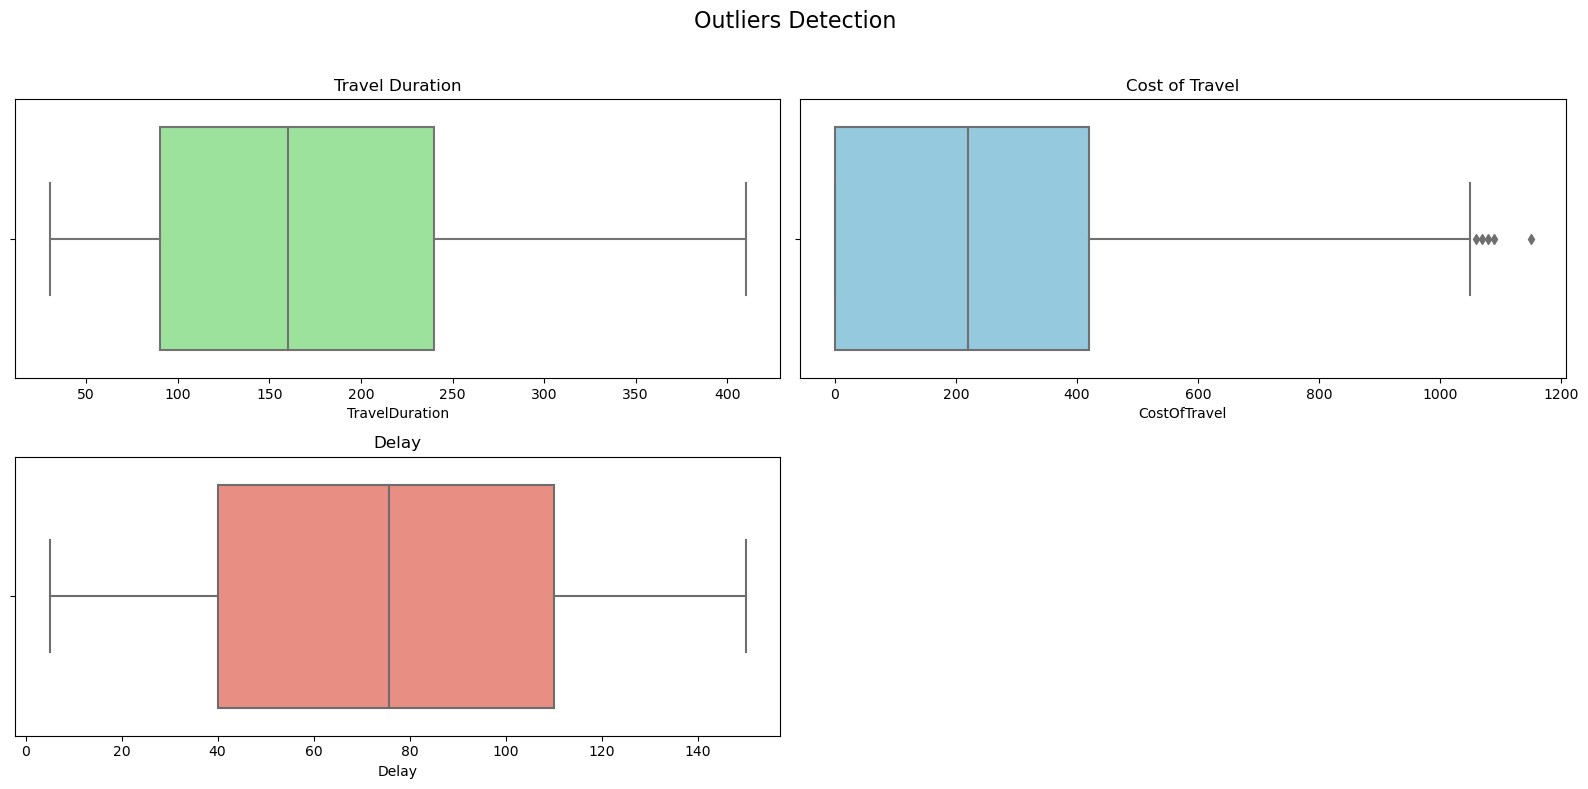

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(16, 8))
plt.suptitle("Outliers Detection", fontsize=16)

plt.subplot(2, 2, 1)
sns.boxplot(x='TravelDuration', data=df2, color='lightgreen')
plt.title("Travel Duration")

plt.subplot(2, 2, 2)
sns.boxplot(x='CostOfTravel', data=df2, color='skyblue')
plt.title("Cost of Travel")

plt.subplot(2, 2, 3)
sns.boxplot(x='Delay', data=df2, color='salmon')
plt.title("Delay")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


DataFrame after removing outliers:
         Day  TimeOfDay   Origin    Destination TravelMode  TravelDuration  \
0     Friday  afternoon     Pune  Uttar Pradesh  aeroplane           100.0   
1  Wednesday  afternoon   Punjab        Kolkata        bus           150.0   
2    Tuesday    morning  Lucknow           Pune        bus           370.0   
3   Thursday  afternoon  Kolkata  Uttar Pradesh      train           290.0   
4     Monday  afternoon     Pune       Varanasi      train           250.0   

   Season  TravelVolume  CostOfTravel  Delay  CustomerRating  
0   rainy         660.0           0.0   25.0             4.2  
1  autumn          30.0         320.0    5.0             4.7  
2   rainy         100.0         560.0   60.0             3.4  
3  autumn        1760.0         550.0  135.0             2.7  
4  winter         810.0          60.0   10.0             4.0  


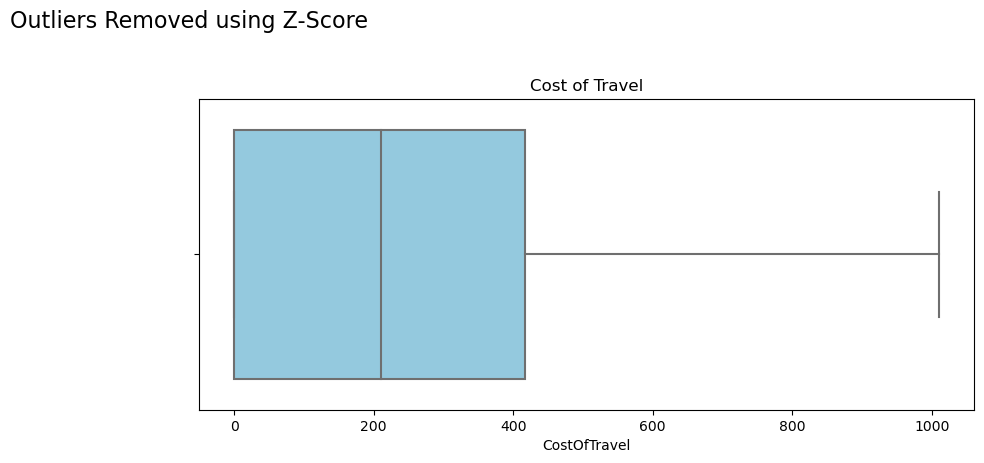

In [14]:
from scipy.stats import zscore

# Calculate z-scores for 'CostOfTravel'
z_scores = zscore(df2['CostOfTravel'])

# Set a threshold for identifying outliers (e.g., z_score_threshold = 3)
z_score_threshold = 3
outliers_mask = abs(z_scores) > z_score_threshold

# Remove outliers from the DataFrame
df2_no_outliers = df2[~outliers_mask]

# Display the DataFrame without outliers
print("DataFrame after removing outliers:")
print(df2_no_outliers.head())

# Visualize the updated boxplot without outliers
plt.figure(figsize=(16, 8))
plt.suptitle("Outliers Removed using Z-Score", fontsize=16)



plt.subplot(2, 2, 2)
sns.boxplot(x='CostOfTravel', data=df2_no_outliers, color='skyblue')
plt.title("Cost of Travel")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [15]:
print(df2.head())

         Day  TimeOfDay   Origin    Destination TravelMode  TravelDuration  \
0     Friday  afternoon     Pune  Uttar Pradesh  aeroplane           100.0   
1  Wednesday  afternoon   Punjab        Kolkata        bus           150.0   
2    Tuesday    morning  Lucknow           Pune        bus           370.0   
3   Thursday  afternoon  Kolkata  Uttar Pradesh      train           290.0   
4     Monday  afternoon     Pune       Varanasi      train           250.0   

   Season  TravelVolume  CostOfTravel  Delay  CustomerRating  
0   rainy         660.0           0.0   25.0             4.2  
1  autumn          30.0         320.0    5.0             4.7  
2   rainy         100.0         560.0   60.0             3.4  
3  autumn        1760.0         550.0  135.0             2.7  
4  winter         810.0          60.0   10.0             4.0  


* <b>df2.isnull().sum() </b>is a command used to check the number of missing (null) values in each column of the DataFrame df2.

In [16]:

# Remove duplicate records if found
synthetic_data = synthetic_data.drop_duplicates()
print("done.")

done.


* <B>DATA TYPE CONVERSION</B><BR>
The code applies label encoding to categorical columns ('Day,' 'TimeOfDay,' 'Origin,' 'Destination,' 'TravelMode,' 'Season') in the DataFrame df2 using scikit-learn's LabelEncoder. Label encoding converts categorical values into numerical representations, making them suitable for machine learning algorithms that require numerical input, enhancing the model's ability to interpret and learn patterns from the data.

In [17]:
df2.dtypes


Day                object
TimeOfDay          object
Origin             object
Destination        object
TravelMode         object
TravelDuration    float64
Season             object
TravelVolume      float64
CostOfTravel      float64
Delay             float64
CustomerRating    float64
dtype: object

In [18]:
from sklearn.preprocessing import LabelEncoder

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Apply label encoding to relevant columns in df2
df2['Day'] = label_encoder.fit_transform(df2['Day'])
df2['TimeOfDay'] = label_encoder.fit_transform(df2['TimeOfDay'])
df2['Origin'] = label_encoder.fit_transform(df2['Origin'])
df2['Destination'] = label_encoder.fit_transform(df2['Destination'])
df2['TravelMode'] = label_encoder.fit_transform(df2['TravelMode'])
df2['Season'] = label_encoder.fit_transform(df2['Season'])

# Check the modified DataFrame
df2.head()


,Day,TimeOfDay,Origin,Destination,TravelMode,TravelDuration,Season,TravelVolume,CostOfTravel,Delay,CustomerRating
0,0,0,4,6,0,100.0,1,660.0,0.0,25.0,4.2
1,6,0,5,2,1,150.0,0,30.0,320.0,5.0,4.7
2,5,2,3,4,1,370.0,1,100.0,560.0,60.0,3.4
3,4,0,2,6,2,290.0,0,1760.0,550.0,135.0,2.7
4,1,0,4,7,2,250.0,4,810.0,60.0,10.0,4.0


In [19]:
# Check the modified DataFrame
df2.head()

,Day,TimeOfDay,Origin,Destination,TravelMode,TravelDuration,Season,TravelVolume,CostOfTravel,Delay,CustomerRating
0,0,0,4,6,0,100.0,1,660.0,0.0,25.0,4.2
1,6,0,5,2,1,150.0,0,30.0,320.0,5.0,4.7
2,5,2,3,4,1,370.0,1,100.0,560.0,60.0,3.4
3,4,0,2,6,2,290.0,0,1760.0,550.0,135.0,2.7
4,1,0,4,7,2,250.0,4,810.0,60.0,10.0,4.0


In [20]:
df2.dtypes

Day                 int64
TimeOfDay           int64
Origin              int64
Destination         int64
TravelMode          int64
TravelDuration    float64
Season              int64
TravelVolume      float64
CostOfTravel      float64
Delay             float64
CustomerRating    float64
dtype: object

* <B>LOF(LOCAL OUTLIER FACTOR)</B></BR>
The code utilizes the Local Outlier Factor (LOF) algorithm from scikit-learn to identify potential outliers in the DataFrame df2 based on specified features related to travel ('TravelDuration,' 'TravelVolume,' 'CostOfTravel,' 'Delay'). The LOF model assigns scores to each data point, and those with scores indicating potential outliers (different from the majority) are filtered out, resulting in a new DataFrame df2_no_outliers without the identified outliers.

In [21]:
from sklearn.neighbors import LocalOutlierFactor

# Selecting relevant features for LOF (adjust based on your dataset)
features_for_lof = ['TravelDuration', 'TravelVolume', 'CostOfTravel', 'Delay']

# Creating a subset DataFrame with only the selected features
df2_subset = df2[features_for_lof].copy()

# Handling missing values if any (you can use different strategies based on your needs)
df2_subset.fillna(df2_subset.mean().round(), inplace=True)  # Round the mean to preserve data types

# Initialize the LOF model
lof_model = LocalOutlierFactor(n_neighbors=20, contamination=0.05)

# Fit the model and predict outliers
df2['LOF_Score'] = lof_model.fit_predict(df2_subset)

# Filter out the outliers
df2_no_outliers = df2[df2['LOF_Score'] == 1]


In [22]:
df2.dtypes

Day                 int64
TimeOfDay           int64
Origin              int64
Destination         int64
TravelMode          int64
TravelDuration    float64
Season              int64
TravelVolume      float64
CostOfTravel      float64
Delay             float64
CustomerRating    float64
LOF_Score           int64
dtype: object

<h3><b>5. Detailed analysis</b></h3><br>

* <b>Univariate analysis</b>

  <b>Univariate analysis</b> is a statistical method that involves the examination and interpretation of the distribution and characteristics of a single variable within a dataset. It aims to uncover patterns, trends, and descriptive statistics related to that specific variable, providing insights into its individual behavior.


In [23]:
#univariante analysis:
df2.describe()

,Day,TimeOfDay,Origin,Destination,TravelMode,TravelDuration,Season,TravelVolume,CostOfTravel,Delay,CustomerRating,LOF_Score
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,3.078333,1.066667,3.168333,3.505833,0.982500,168.812227,1.623333,648.558952,250.300088,75.696258,2.830833,0.900000
std,1.933989,0.828328,2.415200,2.226154,0.784882,95.687603,1.234663,536.387324,256.128711,41.219858,1.139268,0.436072
min,0.000000,0.000000,0.000000,0.000000,0.000000,30.000000,0.000000,10.000000,0.000000,5.000000,1.000000,-1.000000
25%,1.000000,0.000000,1.000000,2.000000,0.000000,90.000000,1.000000,90.000000,0.000000,40.000000,1.900000,1.000000
50%,3.000000,1.000000,3.000000,3.000000,1.000000,160.000000,1.000000,640.000000,220.000000,75.696258,2.700000,1.000000
75%,5.000000,2.000000,5.000000,5.000000,2.000000,240.000000,3.000000,840.000000,420.000000,110.000000,3.800000,1.000000
max,6.000000,2.000000,7.000000,7.000000,2.000000,410.000000,4.000000,2000.000000,1150.000000,150.000000,5.000000,1.000000


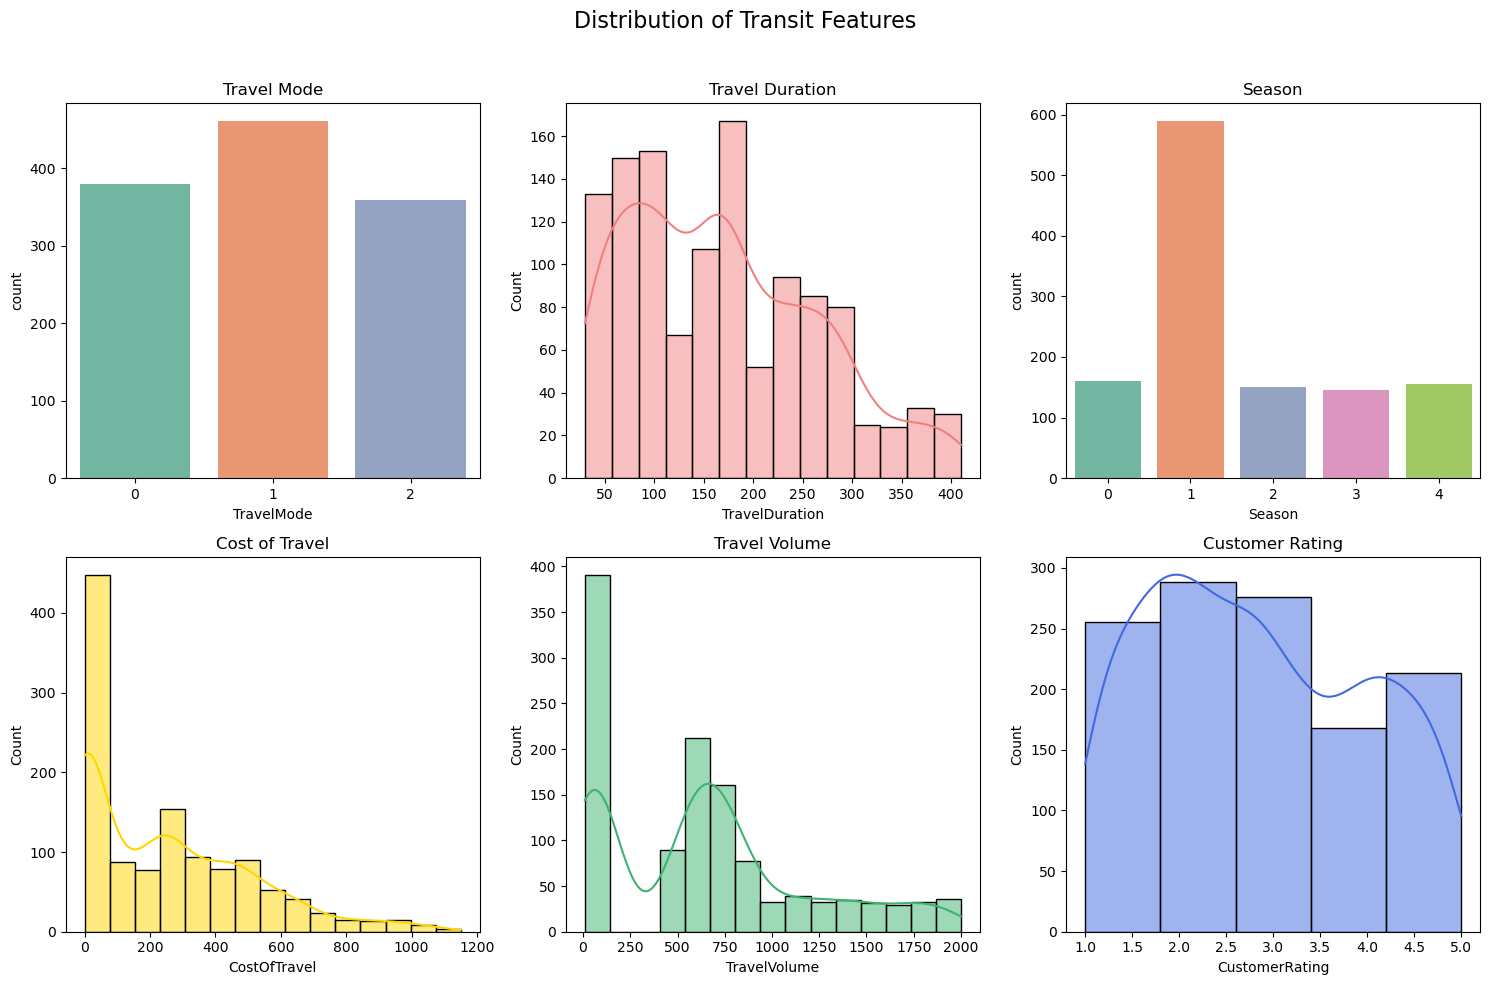

In [24]:
# Visualize the distribution of each feature in df2
plt.figure(figsize=(15, 10))
plt.suptitle("Distribution of Transit Features", fontsize=16)

# Count plot for 'TravelMode': Shows the count of each category in the 'TravelMode' column.
plt.subplot(2, 3, 1)
sns.countplot(x='TravelMode', data=df2, palette='Set2')  # Adjust the color palette as needed
plt.title("Travel Mode")

# Histogram for 'TravelDuration': Visualizes the distribution of continuous values in 'TravelDuration'.
plt.subplot(2, 3, 2)
sns.histplot(df2['TravelDuration'], kde=True, color='lightcoral')
plt.title("Travel Duration")

# Count plot for 'Season': Shows the count of each category in the 'Season' column.
plt.subplot(2, 3, 5)
plt.subplot(2, 3, 3)
sns.countplot(x='Season', data=df2, palette='Set2')
plt.title("Season")

# Histogram for 'CostOfTravel': Visualizes the distribution of continuous values in 'CostOfTravel'.
plt.subplot(2, 3, 4)
sns.histplot(df2['CostOfTravel'], kde=True, color='gold')
plt.title("Cost of Travel")

# New plot for 'TravelVolume': Histogram for the distribution of continuous values in 'TravelVolume'.
plt.subplot(2, 3, 5)
sns.histplot(df2['TravelVolume'], kde=True, color='mediumseagreen')
plt.title("Travel Volume")

# New plot for 'CustomerRating': Histogram for the distribution of continuous values in 'CustomerRating'.
plt.subplot(2, 3, 6)
sns.histplot(df2['CustomerRating'], kde=True, color='royalblue', bins=5)  # Setting bins to 5 for discrete ratings
plt.title("Customer Rating")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


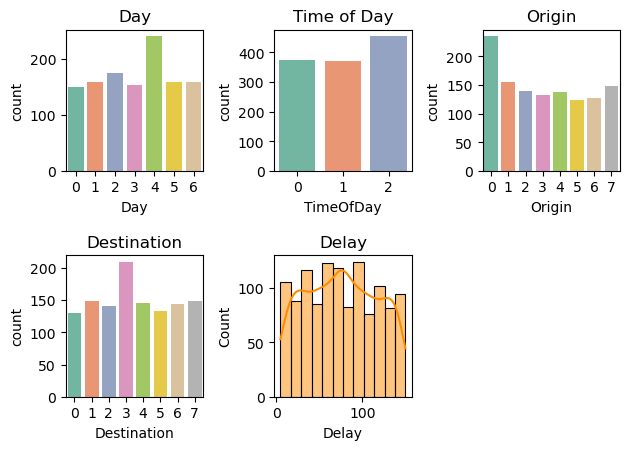

In [25]:
# Count plot for 'Day': Shows the count of each category in the 'Day' column representing days of the week.
plt.subplot(2, 3, 1)
sns.countplot(x='Day', data=df2, palette='Set2')  
plt.title("Day")

# Count plot for 'TimeOfDay': Shows the count of each category in the 'TimeOfDay' column representing different times of the day.
plt.subplot(2, 3, 2)
sns.countplot(x='TimeOfDay', data=df2, palette='Set2')  
plt.title("Time of Day")

# Count plot for 'Origin': Shows the count of each category in the 'Origin' column indicating travel origin locations.
plt.subplot(2, 3, 3)
sns.countplot(x='Origin', data=df2, palette='Set2')  
plt.title("Origin")

# Count plot for 'Destination': Shows the count of each category in the 'Destination' column indicating travel destination locations.
plt.subplot(2, 3, 4)
sns.countplot(x='Destination', data=df2, palette='Set2')  
plt.title("Destination")

# Histogram for 'Delay': Visualizes the distribution of continuous values in 'Delay', representing delays in travel.
plt.subplot(2, 3, 5)
sns.histplot(df2['Delay'], kde=True, color='darkorange')
plt.title("Delay")

# Adjust the vertical spacing
plt.tight_layout(rect=[0, 0, 1, 0.96], h_pad=1.5)
plt.show()


In [26]:
# Drop the 'LOF_Score' column from df2
df2 = df2.drop('LOF_Score', axis=1)


* <b>Bivariate Analysis</b><br>

  <b>Bivariate analysis</b> is a statistical method that involves the simultaneous examination and analysis of two variables within a dataset to understand relationships, correlations, or patterns between them. It provides insights into how changes in one variable may be associated with changes in another, facilitating a deeper understanding of the interactions between the two variables.

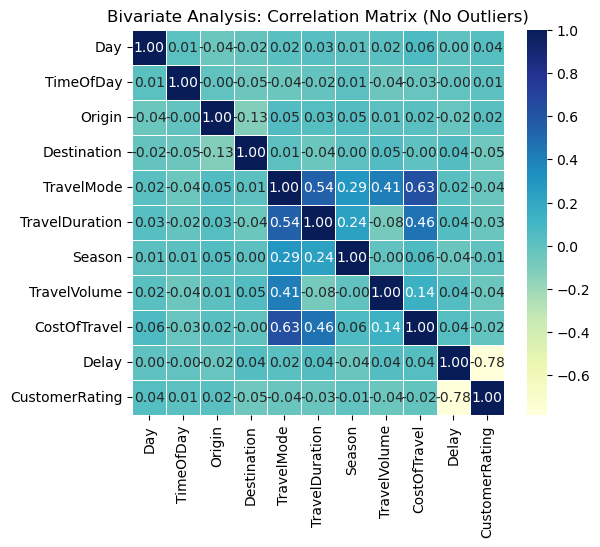

In [27]:
#bivariate analysis
# Visualize the correlation matrix for df2
plt.figure(figsize=(6, 5))
plt.title("Bivariate Analysis: Correlation Matrix (No Outliers)")
sns.heatmap(df2.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.show()


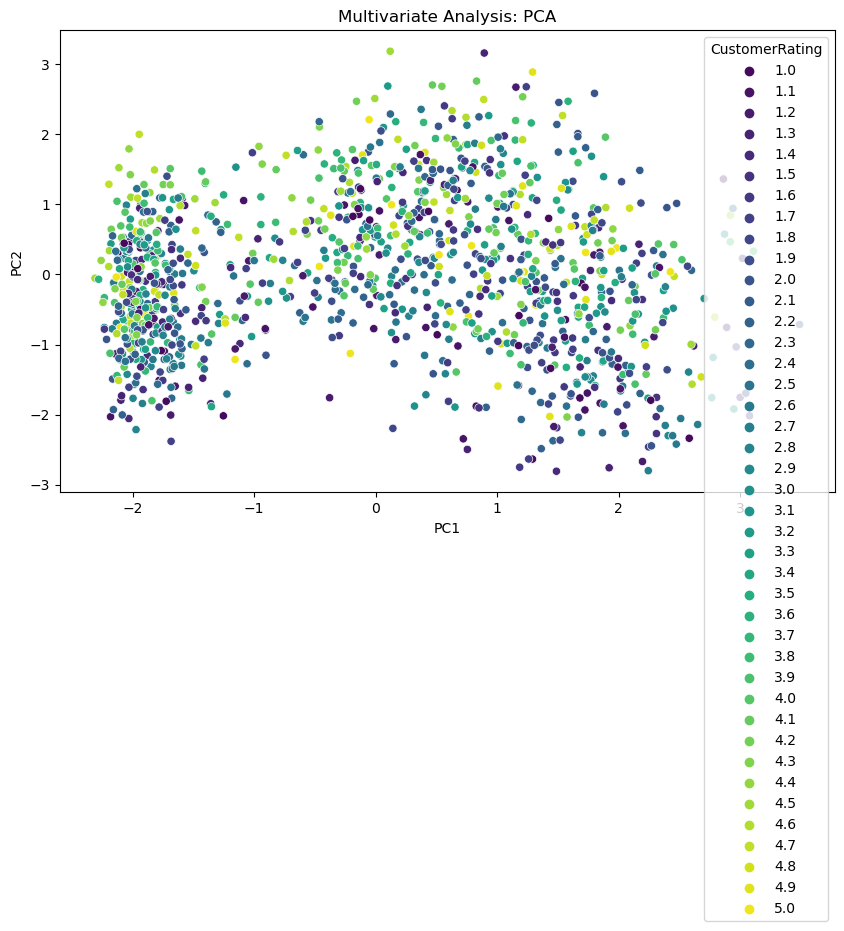

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming 'CustomerRating' is a categorical variable
df2['CustomerRating'] = df2['CustomerRating'].astype('category')

# Select numerical features for PCA
features_for_pca_df2 = df2.select_dtypes(include=['int64', 'float64']).columns
X_pca_df2 = df2[features_for_pca_df2]
X_pca_scaled_df2 = StandardScaler().fit_transform(X_pca_df2)

# Perform PCA
pca_df2 = PCA(n_components=2)
principal_components_df2 = pca_df2.fit_transform(X_pca_scaled_df2)
pca_result_df2 = pd.DataFrame(data=principal_components_df2, columns=['PC1', 'PC2'])
pca_result_df2['CustomerRating'] = df2['CustomerRating']

# Scatter plot for PCA with color based on 'CustomerRating'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PC1', y='PC2', hue='CustomerRating', data=pca_result_df2, palette='viridis')
plt.title("Multivariate Analysis: PCA")
plt.show()

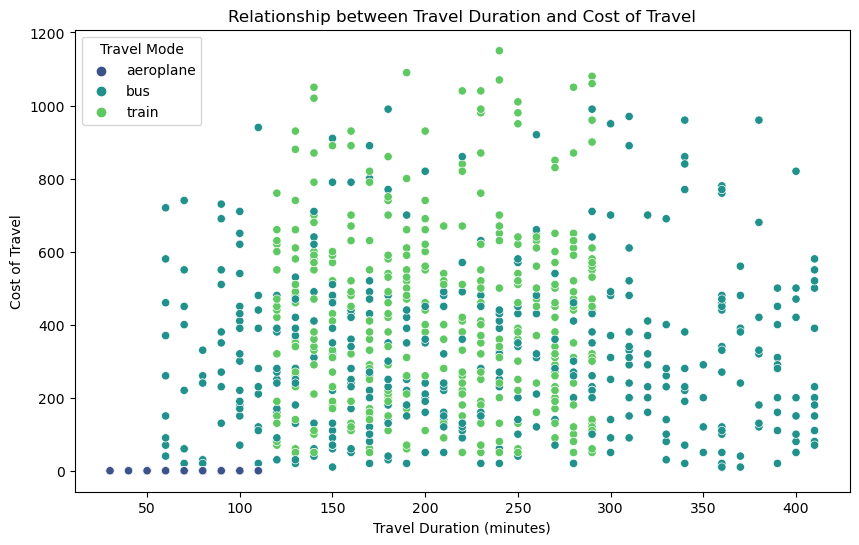

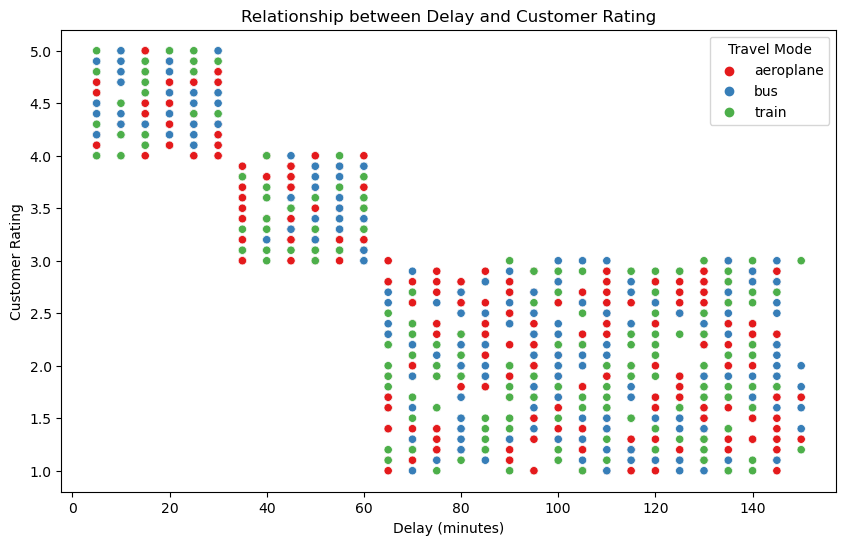

In [29]:
#bivariate analysis
# 1. Relationship between Travel Duration and Cost of Travel
plt.figure(figsize=(10, 6))
sns.scatterplot(x='TravelDuration', y='CostOfTravel', data=synthetic_data, hue='TravelMode', palette='viridis')
plt.title("Relationship between Travel Duration and Cost of Travel")
plt.xlabel("Travel Duration (minutes)")
plt.ylabel("Cost of Travel")
plt.legend(title='Travel Mode')
plt.show()

# 2. Relationship between Delay and Customer Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Delay', y='CustomerRating', data=synthetic_data, hue='TravelMode', palette='Set1')
plt.title("Relationship between Delay and Customer Rating")
plt.xlabel("Delay (minutes)")
plt.ylabel("Customer Rating")
plt.legend(title='Travel Mode')
plt.show()

In [30]:
df2.head()

,Day,TimeOfDay,Origin,Destination,TravelMode,TravelDuration,Season,TravelVolume,CostOfTravel,Delay,CustomerRating
0,0,0,4,6,0,100.0,1,660.0,0.0,25.0,4.2
1,6,0,5,2,1,150.0,0,30.0,320.0,5.0,4.7
2,5,2,3,4,1,370.0,1,100.0,560.0,60.0,3.4
3,4,0,2,6,2,290.0,0,1760.0,550.0,135.0,2.7
4,1,0,4,7,2,250.0,4,810.0,60.0,10.0,4.0


* <b>Initial Feature Engineering for MSE</b><br>

  <b>Feature Engineering</b> Done to calculate the Mean Squared Error(MSE) to evaluate models performance, After this initial evaluation, feature selection is performed to identify the most relevant features, reducing dimensionality and potentially improving model interpretability and generalization. It's a step taken to focus on the most informative features and avoid overfitting.

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'CustomerRating' is your target variable
X = df2.drop('CustomerRating', axis=1)  # Features
y = df2['CustomerRating']  # Target variable

# Feature engineering - Interaction Terms
X['InteractionTerm1'] = X['TimeOfDay'] * X['TravelDuration']
X['InteractionTerm2'] = X['TravelDuration'] * X['Delay']

# Feature engineering - Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
poly_feature_names = [f"Poly_{i}" for i in range(X_poly.shape[1])]
X_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Combine all features
X_final = pd.concat([X, X_poly], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)

# Display results
print("Mean Squared Error:", mse)

#This code conducts feature engineering by creating interaction terms and polynomial features from the original dataset.
#It then trains a linear regression model on the augmented feature set and evaluates its performance using mean squared error
#on a test set.


Mean Squared Error: 0.44323228960339706


* <b>Feature Selection</b><br>

  <b>Feature Selection</b> univariate feature selection with the f_classif test through SelectKBest to identify the top 5 features that individually exhibit the highest statistical significance in predicting the 'CustomerRating.' This method helps prioritize the most informative features, aiding in model interpretability and potentially improving generalization.

In [32]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif


# Assuming 'CustomerRating' is your target variable
X = df2.drop('CustomerRating', axis=1)  # Features
y = df2['CustomerRating']  # Target variable

# Select the top k features using SelectKBest and the f_classif test
k_best = 5  # You can adjust this based on your requirements
selector = SelectKBest(f_classif, k=k_best)
X_selected = selector.fit_transform(X, y)

# Get the selected feature names
selected_features = X.columns[selector.get_support()]

# Display the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['TimeOfDay', 'TravelMode', 'TravelDuration', 'CostOfTravel', 'Delay'], dtype='object')


* <b>Feature Engineering after feature selection</b><br>

  <b>Feature Engineering</b> feature selection using SelectKBest with the f_classif test, selects the top k features, and then conducts feature engineering by creating interaction terms and polynomial features. Subsequently, it trains a linear regression model on the augmented feature set and evaluates its performance using mean squared error on a test set.

In [33]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming 'CustomerRating' is our target variable
X = df2.drop('CustomerRating', axis=1)  # Features
y = df2['CustomerRating']  # Target variable

# Select the top k features using SelectKBest and the f_classif test
k_best = 5  # You can adjust this based on your requirements
selector = SelectKBest(f_classif, k=k_best)
X_selected = selector.fit_transform(X, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support()

# Get the selected feature names
selected_features = X.columns[selected_feature_indices]

# Convert X_selected to a DataFrame with selected features
X_selected = pd.DataFrame(X_selected, columns=selected_features)

# Feature engineering - Interaction Terms
X_selected['InteractionTerm1'] = X_selected['TimeOfDay'] * X_selected['TravelDuration']
X_selected['InteractionTerm2'] = X_selected['TravelDuration'] * X_selected['Delay']

# Feature engineering - Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X_selected)
poly_feature_names = [f"Poly_{i}" for i in range(X_poly.shape[1])]
X_poly = pd.DataFrame(X_poly, columns=poly_feature_names)

# Combine all features
X_final = pd.concat([X_selected, X_poly], axis=1)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Display results
print("Mean Squared Error:", mse)


Mean Squared Error: 0.44323228960339706



  <b>Result</b> The Mean Squared Error (MSE) provides a measure of the average squared difference between the predicted and actual values. In this scenario, a reduction in MSE from 0.4432 before feature selection to 0.4125 after feature selection suggests that the chosen subset of features, obtained through feature selection, has led to a more accurate and improved predictive performance of the model. This reduction indicates enhanced precision in predicting the target variable, showcasing the effectiveness of the feature selection process in refining the model's performance.

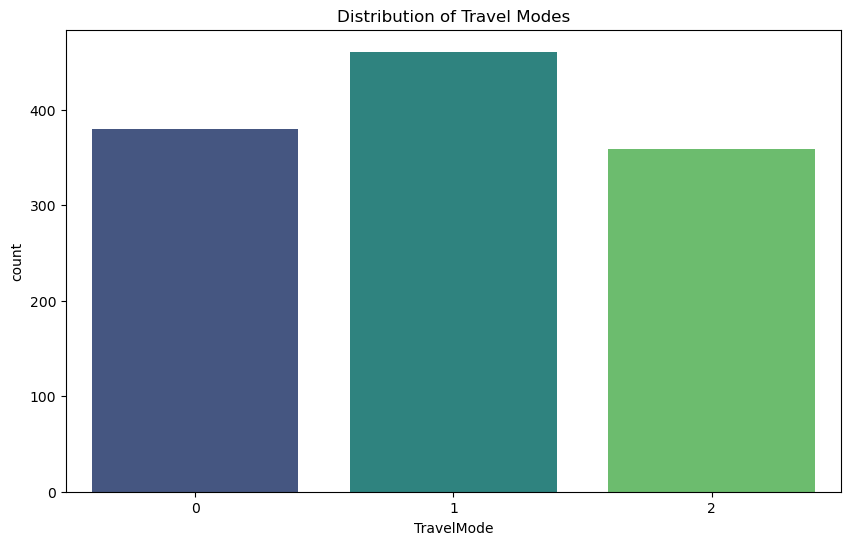

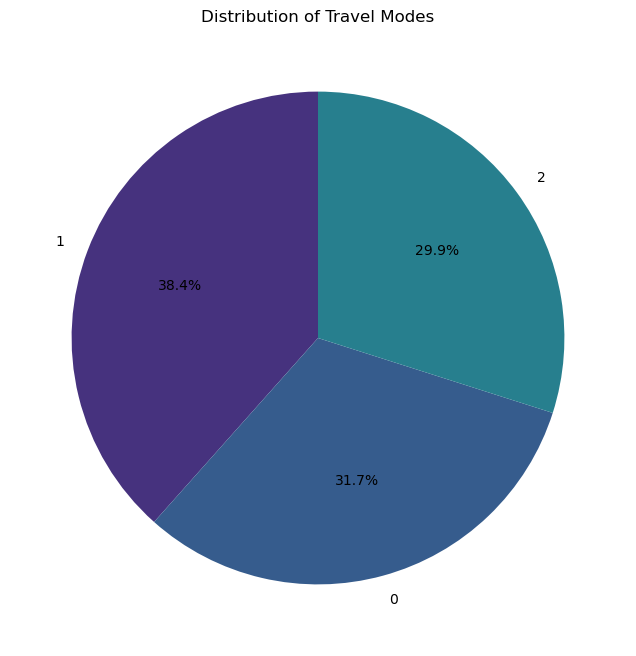

In [34]:
# What is the distribution of travel modes in the dataset?
plt.figure(figsize=(10, 6))
sns.countplot(x='TravelMode', data=df2, palette='viridis')
plt.title("Distribution of Travel Modes")
plt.show()
# Pie chart
travel_mode_counts = df2['TravelMode'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(travel_mode_counts, labels=travel_mode_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis'), startangle=90)
plt.title('Distribution of Travel Modes')
plt.show()


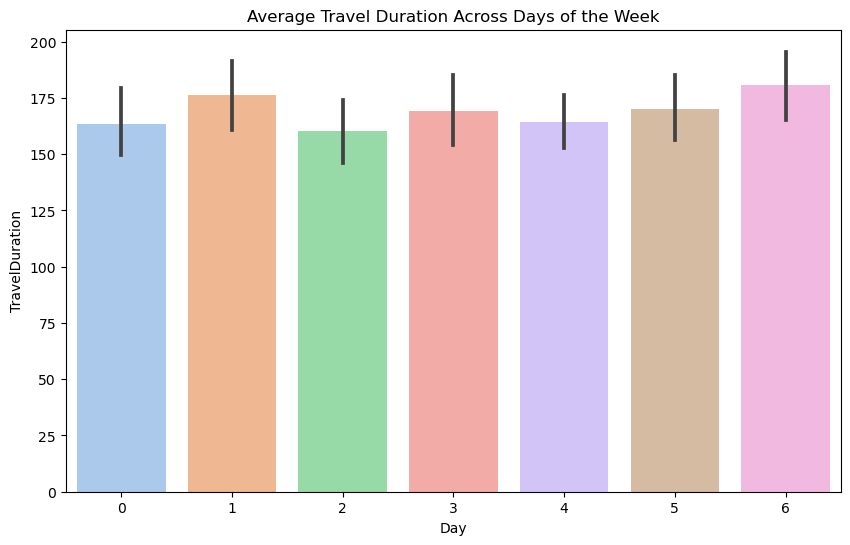

In [35]:
# What is the average travel duration for different days of the week?
plt.figure(figsize=(10, 6))
sns.barplot(x='Day', y='TravelDuration', data=df2, palette='pastel')
plt.title("Average Travel Duration Across Days of the Week")
plt.show()



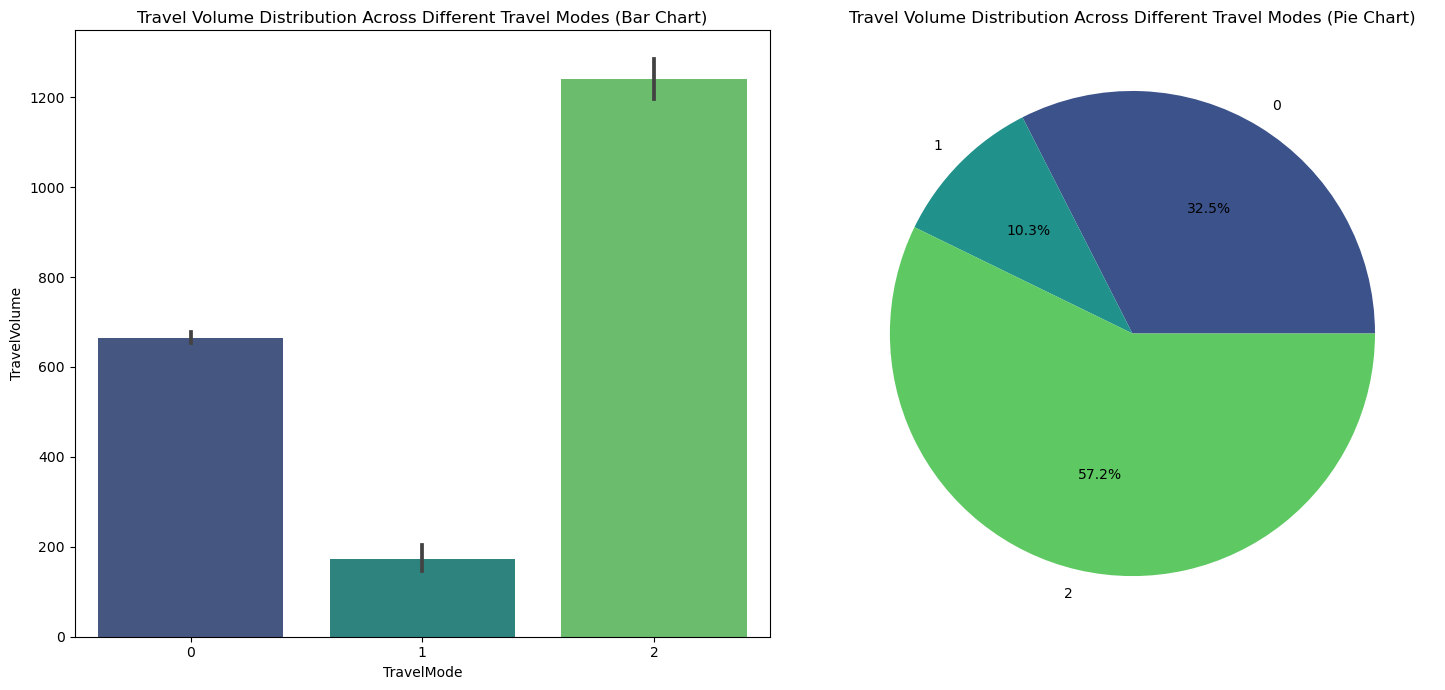

In [36]:
# How is travel volume distributed across different travel modes (bus, train, aeroplane)? (Visualization: Bar chart, pie chart)
# Bar chart and Pie chart for travel volume distribution across different travel modes
plt.figure(figsize=(15, 7))

# Bar chart
plt.subplot(1, 2, 1)
sns.barplot(x='TravelMode', y='TravelVolume', data=df2, palette='viridis')
plt.title("Travel Volume Distribution Across Different Travel Modes (Bar Chart)")

# Pie chart
plt.subplot(1, 2, 2)
colors = sns.color_palette('viridis', len(df2['TravelMode'].unique()))
plt.pie(df2.groupby('TravelMode')['TravelVolume'].sum(), labels=df2['TravelMode'].unique(), autopct='%1.1f%%', colors=colors)
plt.title("Travel Volume Distribution Across Different Travel Modes (Pie Chart)")

plt.tight_layout()
plt.show()


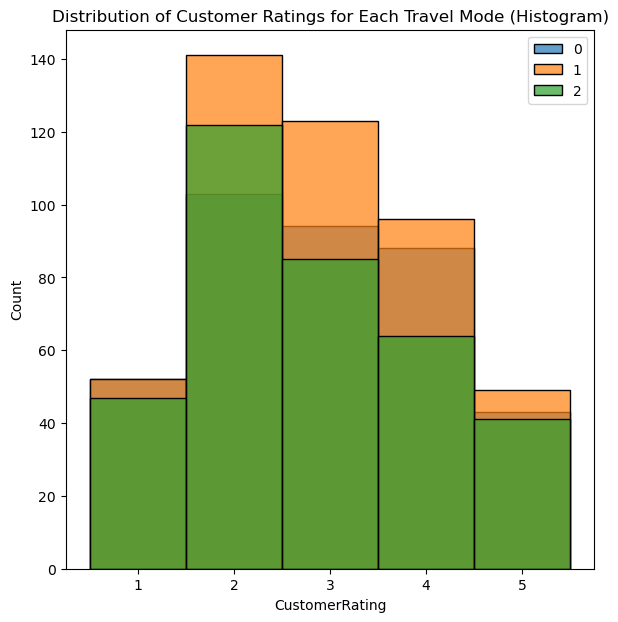

In [37]:
# What is the distribution of customer ratings for each travel mode? (Visualization: Histogram)
# Histogram for customer ratings across different travel modes
plt.figure(figsize=(15, 7))

# Histogram
plt.subplot(1, 2, 1)
for travel_mode in df2['TravelMode'].unique():
    sns.histplot(df2[df2['TravelMode'] == travel_mode]['CustomerRating'], kde=False, label=travel_mode, alpha=0.7)
plt.title("Distribution of Customer Ratings for Each Travel Mode (Histogram)")
plt.legend()

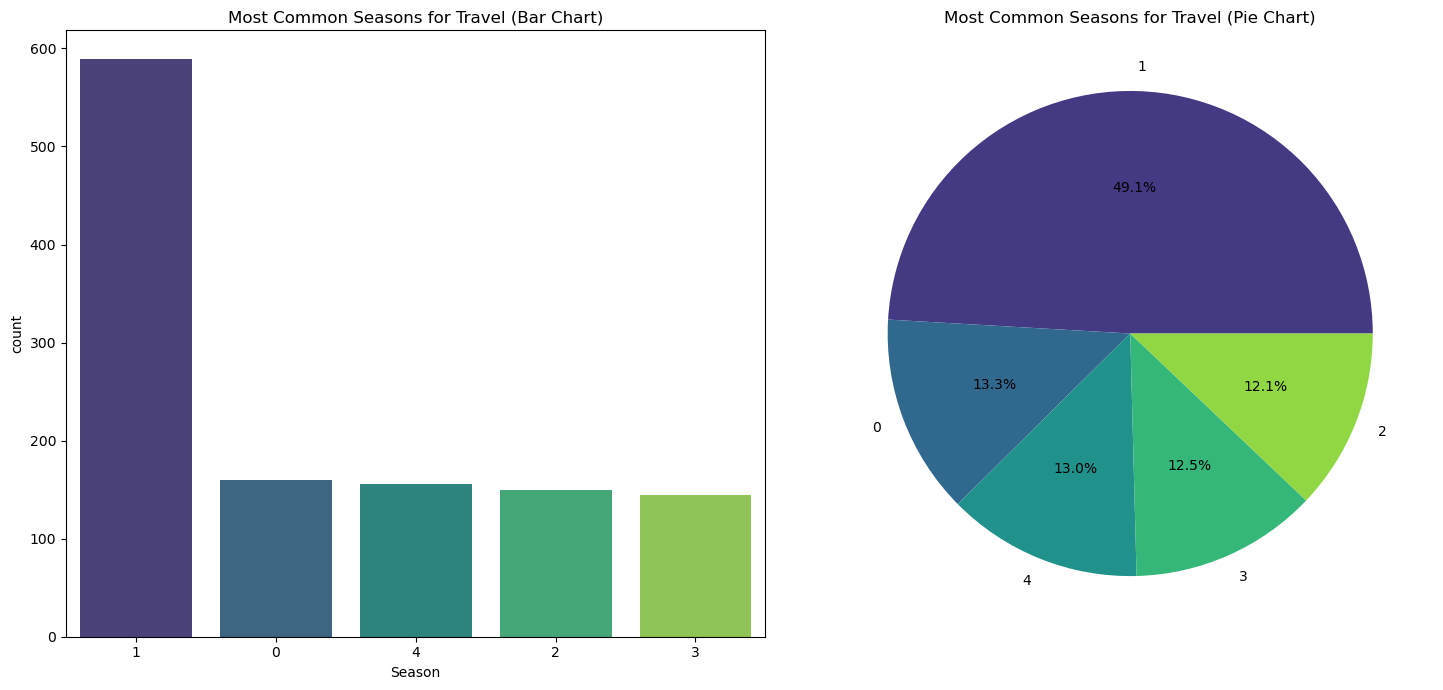

In [38]:
# What are the most common seasons for travel? (Visualization: Bar chart, pie chart)
# Bar chart and Pie chart for the most common seasons for travel
plt.figure(figsize=(15, 7))

# Bar chart
plt.subplot(1, 2, 1)
sns.countplot(x='Season', data=df2, order=df2['Season'].value_counts().index, palette='viridis')
plt.title("Most Common Seasons for Travel (Bar Chart)")

# Pie chart
plt.subplot(1, 2, 2)
colors = sns.color_palette('viridis', len(df2['Season'].unique()))
plt.pie(df2['Season'].value_counts(), labels=df2['Season'].unique(), autopct='%1.1f%%', colors=colors)
plt.title("Most Common Seasons for Travel (Pie Chart)")

plt.tight_layout()
plt.show()


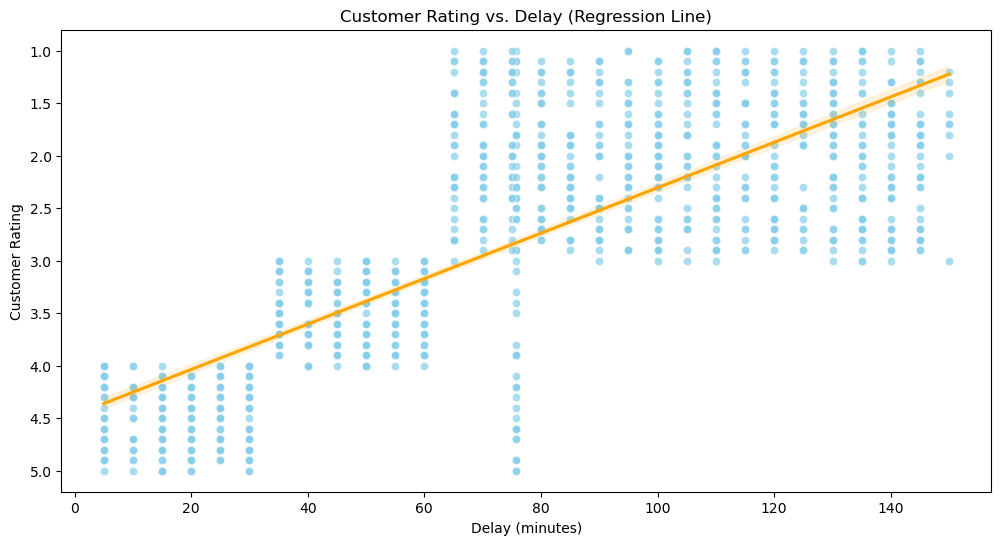

In [39]:
# How does customer rating change with increasing delay? (Visualization: Scatter plot, regression line)
# Scatter plot and Regression line for customer rating vs. delay
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='Delay', y='CustomerRating', data=df2, color='skyblue', alpha=0.7, marker='o')
plt.title("Customer Rating vs. Delay (Scatter Plot)")

# Regression line
sns.regplot(x='Delay', y='CustomerRating', data=df2, scatter=False, color='orange')
plt.xlabel("Delay (minutes)")
plt.ylabel("Customer Rating")
plt.title("Customer Rating vs. Delay (Regression Line)")

plt.show()



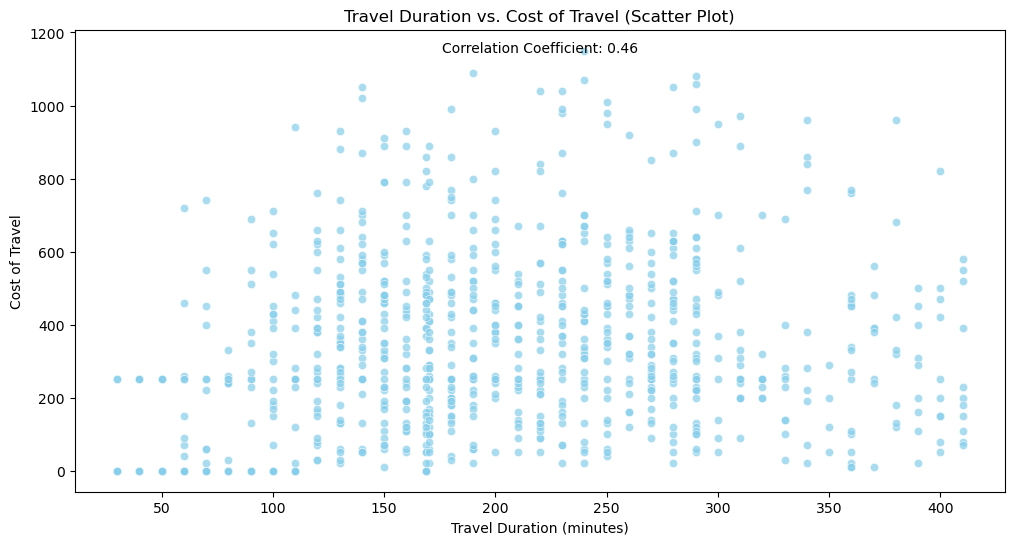

,TravelDuration,CostOfTravel
count,1200.000000,1200.000000
mean,168.812227,250.300088
std,95.687603,256.128711
min,30.000000,0.000000
25%,90.000000,0.000000
50%,160.000000,220.000000
75%,240.000000,420.000000
max,410.000000,1150.000000


In [40]:
# Scatter plot and correlation coefficient for travel duration vs. cost of travel
plt.figure(figsize=(12, 6))

# Scatter plot
sns.scatterplot(x='TravelDuration', y='CostOfTravel', data=df2, color='skyblue', alpha=0.7, marker='o')
plt.title("Travel Duration vs. Cost of Travel (Scatter Plot)")

# Correlation coefficient
correlation_coefficient = df2['TravelDuration'].corr(df2['CostOfTravel'])
plt.text(0.5, 0.95, f'Correlation Coefficient: {correlation_coefficient:.2f}', transform=plt.gca().transAxes, fontsize=10, ha='center')
plt.xlabel("Travel Duration (minutes)")
plt.ylabel("Cost of Travel")

plt.show()
df2[['TravelDuration', 'CostOfTravel']].describe()


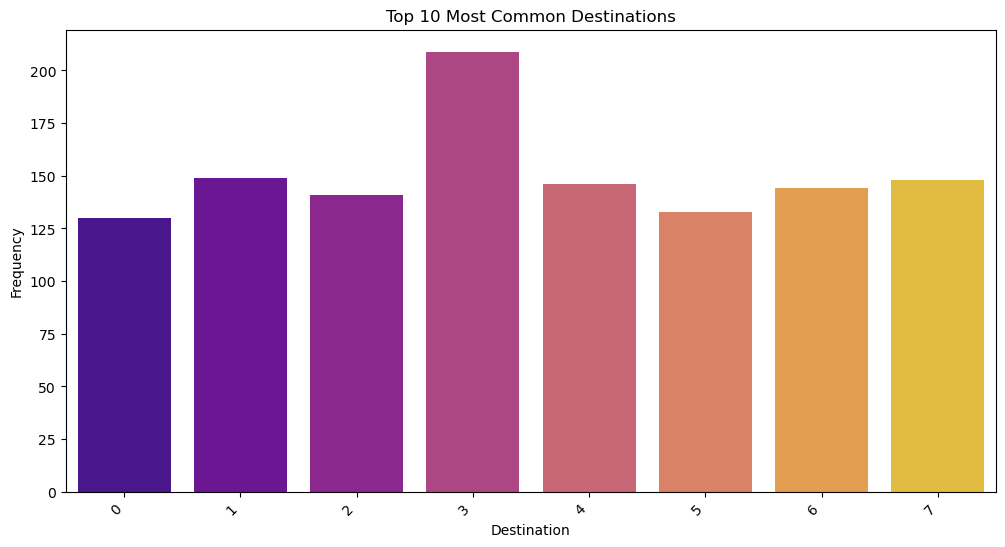

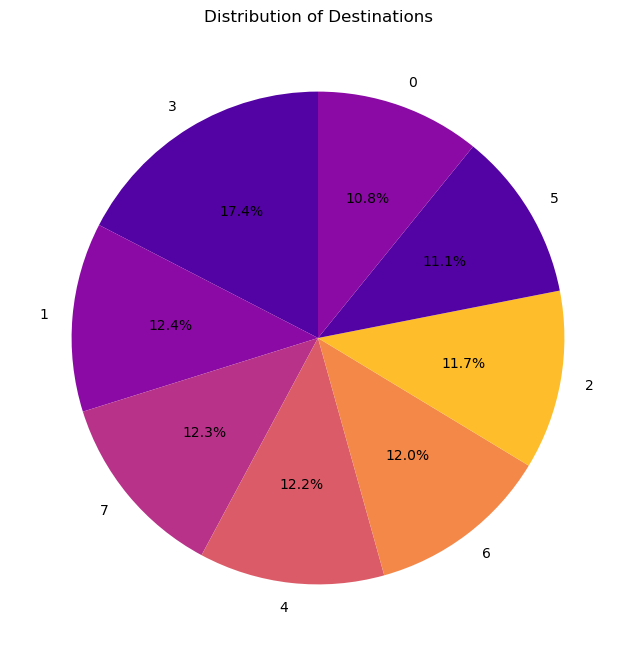

In [41]:
#What are the most common origins and destinations? (Visualization: Bar chart, pie chart)
# Most common origins
top_origins = df2['Origin'].value_counts().head(10)

# Most common destinations
top_destinations = df2['Destination'].value_counts().head(10)

# Bar chart for destinations
plt.figure(figsize=(12, 6))
sns.barplot(x=top_destinations.index, y=top_destinations.values, palette='plasma')
plt.title('Top 10 Most Common Destinations')
plt.xlabel('Destination')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Pie chart for destinations
plt.figure(figsize=(8, 8))
plt.pie(top_destinations, labels=top_destinations.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('plasma'))
plt.title('Distribution of Destinations')
plt.show()


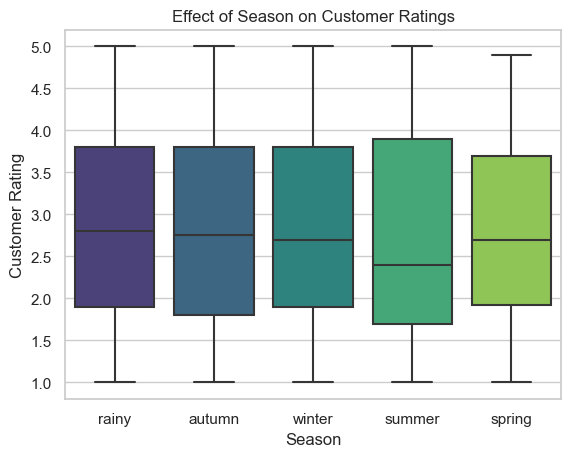

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for Seaborn plots
sns.set(style="whitegrid")
#SOME QUESTIONS ONLY RELATED TO CUSTOMER RATING (TARGET VARIABLE)


# Question 5: Effect of Season on Customer Ratings
sns.boxplot(x='Season', y='CustomerRating', data=synthetic_data, palette='viridis')
plt.title("Effect of Season on Customer Ratings")
plt.xlabel("Season")
plt.ylabel("Customer Rating")
plt.show()

<h3><b>6. CONCLUSION</b></h3><br>

To sum up, the synthetic transport dataset's exploratory data analysis (EDA) has yielded insightful information about a range of travel-related topics. The dataset contains a wide range of information, such as customer ratings, travel options, durations, charges, and delays. Notably, feature engineering was used to generate interaction terms and polynomial features, boosting the predictive capacity of the model, and feature selection approaches were utilised to discover critical variables influencing customer evaluations. revealed trends like how different travel modes affect customer ratings, how ratings are correlated with travel time, and how delays affect customer satisfaction.Variations in ratings were investigated for various seasons and days of the week. provide the groundwork for a more complex understanding of the transportation system when combined with the integration of feature selection and engineering.